# Airline Flight Delay Prediction – Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on the Airline Delay dataset.

Objectives:
- Understand dataset structure
- Identify missing values
- Analyze delay distribution
- Explore seasonality patterns
- Investigate weather impact on delays

In [52]:
#loading dataset and dataset overview

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\gopim\Downloads\Airline_Delay_Cause.csv")

In [53]:
# Shape
df.shape

(171666, 21)

The dataset contains 171,666 airport-month records and 21 features including delay counts, delay minutes, cancellations, and diversion metrics.

In [54]:
# Preview first rows
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [55]:
# Column names
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [56]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [57]:
# Missing values
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

## Seasonality Analysis

This plot shows the average arrival delay by month.

We analyze whether certain months (e.g., winter or summer) experience higher delays.

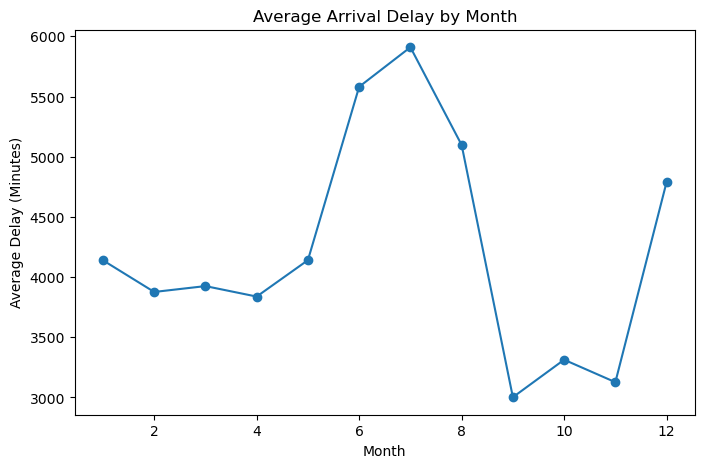

In [64]:
monthly_delay = df.groupby("month")["arr_delay"].mean()

plt.figure(figsize=(8,5))
monthly_delay.plot(marker='o')
plt.title("Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (Minutes)")
plt.show()

## Distribution of Total Arrival Delay

This plot shows the distribution of total arrival delay minutes across airport-month observations.

We expect a right-skewed distribution due to extreme disruption events.

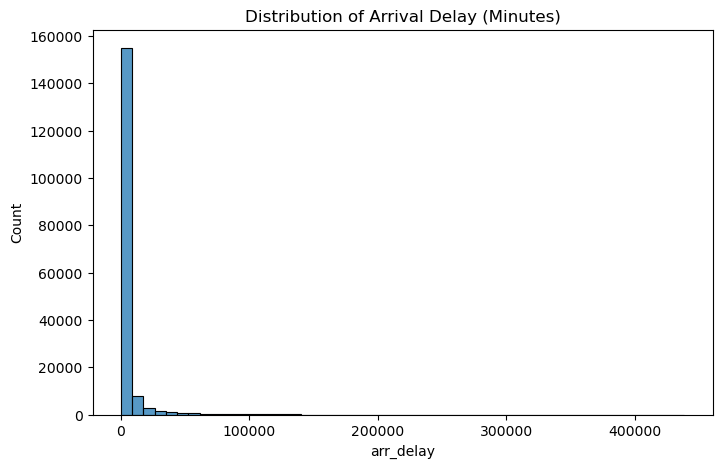

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["arr_delay"], bins=50)
plt.title("Distribution of Arrival Delay (Minutes)")
plt.show()

## Weather Impact on Arrival Delay

This scatter plot examines the relationship between weather-related delay and total arrival delay.

A positive relationship would suggest weather significantly contributes to overall delays.

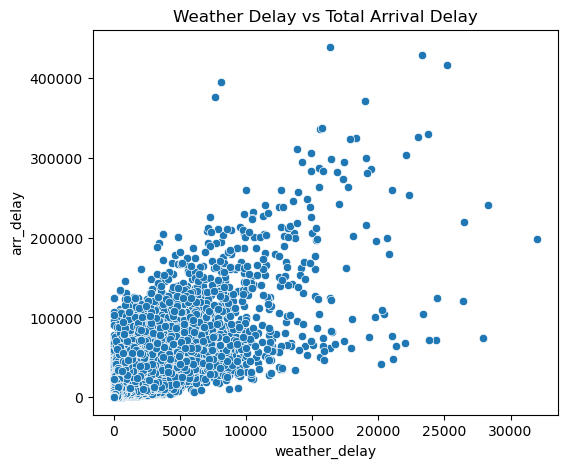

In [70]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="weather_delay", y="arr_delay", data=df)
plt.title("Weather Delay vs Total Arrival Delay")
plt.show()

## Top 10 Airports by Average Delay

This plot identifies airports with the highest average arrival delay.

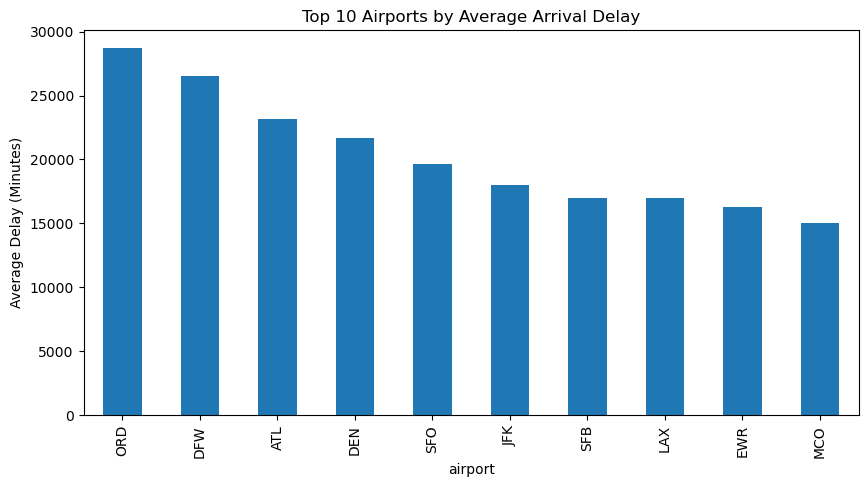

In [72]:
top_airports = df.groupby("airport")["arr_delay"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_airports.plot(kind="bar")
plt.title("Top 10 Airports by Average Arrival Delay")
plt.ylabel("Average Delay (Minutes)")
plt.show()

## Correlation Matrix

This heatmap shows correlations between numerical features to identify strong relationships.

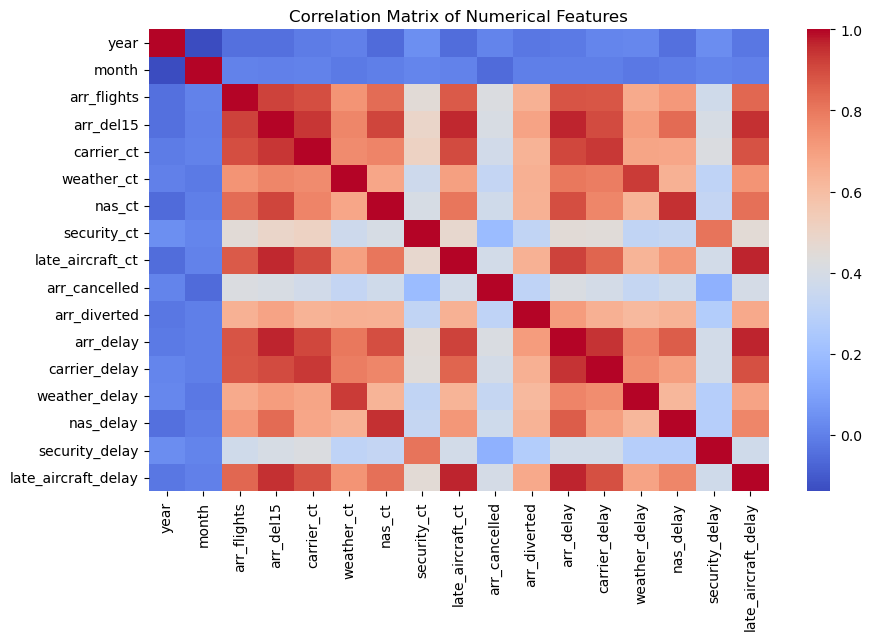

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Creating High-Delay Classification Variable

We create a binary variable to classify airport-month periods as high delay or normal delay.

In [77]:
df["high_delay_flag"] = (df["arr_delay"] > df["arr_delay"].median()).astype(int)
df["high_delay_flag"].value_counts()

high_delay_flag
0    85999
1    85667
Name: count, dtype: int64